In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('./ablation_ddpg', index_col=0)

In [4]:
df.head()

,alg,HIDDEN,REPLAY_SIZE,BATCH,Precision@5,Precision@10,Precision@15,Precision@20,NDCG@5,NDCG@10,NDCG@15,NDCG@20
0,ddpg,16,1000,32,0.591419,0.580345,0.567759,0.562063,0.706962,0.790469,0.887790,0.992292
1,ddpg,16,10000,32,0.621716,0.590987,0.568654,0.562114,0.730281,0.798208,0.888529,0.992292
2,ddpg,16,20000,32,0.634180,0.605848,0.579264,0.562063,0.741247,0.809519,0.897738,0.992292
3,ddpg,16,30000,32,0.634180,0.605848,0.579136,0.562063,0.741247,0.809519,0.897624,0.992292
4,ddpg,16,1000,64,0.621716,0.590700,0.568718,0.562114,0.730281,0.797992,0.888568,0.992292


In [10]:
df.groupby(['HIDDEN', 'REPLAY_SIZE']).mean().reset_index()

,HIDDEN,REPLAY_SIZE,BATCH,Precision@5,Precision@10,Precision@15,Precision@20,NDCG@5,NDCG@10,NDCG@15,NDCG@20
0,16,1000,120,0.614717,0.590556,0.571450,0.562076,0.725468,0.797822,0.890888,0.992292
1,16,10000,120,0.609636,0.589357,0.570795,0.562076,0.721326,0.797129,0.890403,0.992292
2,16,20000,120,0.609252,0.592569,0.574678,0.562075,0.721420,0.799962,0.893947,0.992301
3,16,30000,120,0.622339,0.599880,0.577938,0.562100,0.731711,0.805131,0.896495,0.992301
4,32,1000,120,0.619703,0.598753,0.579520,0.562125,0.729485,0.804284,0.897578,0.992311
5,32,10000,120,0.619271,0.595877,0.575685,0.562100,0.729287,0.802146,0.894677,0.992301
6,32,20000,120,0.616874,0.594271,0.575956,0.562137,0.726696,0.800869,0.894476,0.992320
7,32,30000,120,0.619319,0.596668,0.576452,0.562088,0.729207,0.802438,0.894901,0.992301
8,64,1000,120,0.631016,0.602684,0.579136,0.562125,0.738114,0.807104,0.897115,0.992311
9,64,10000,120,0.621237,0.593959,0.577411,0.562126,0.730174,0.800797,0.895898,0.992301


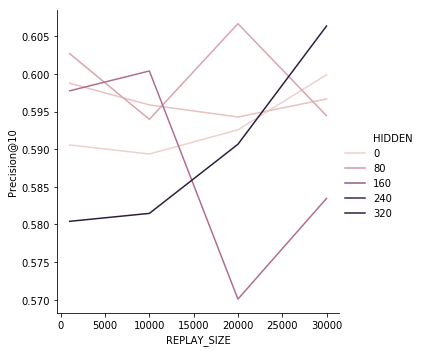

In [11]:
sns.relplot(x="REPLAY_SIZE", y="Precision@10",
#             size="BATCH", 
            hue="HIDDEN",
            kind="line", data=df.groupby(['HIDDEN', 'REPLAY_SIZE']).mean().reset_index());

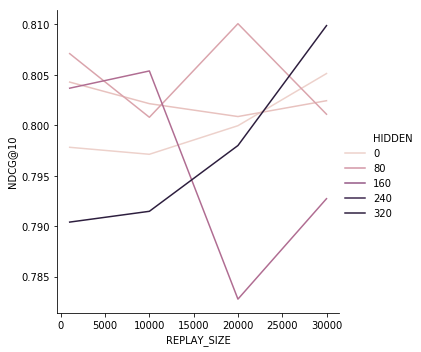

In [13]:
sns.relplot(x="REPLAY_SIZE", y="NDCG@10",
#             size="BATCH", 
            hue="HIDDEN",
            kind="line", data=df.groupby(['HIDDEN', 'REPLAY_SIZE']).mean().reset_index());

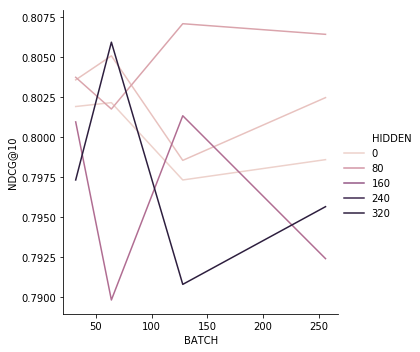

In [14]:
sns.relplot(x="BATCH", y="NDCG@10",
#             size="BATCH", 
            hue="HIDDEN",
            kind="line", data=df.groupby(['HIDDEN', 'BATCH']).mean().reset_index());

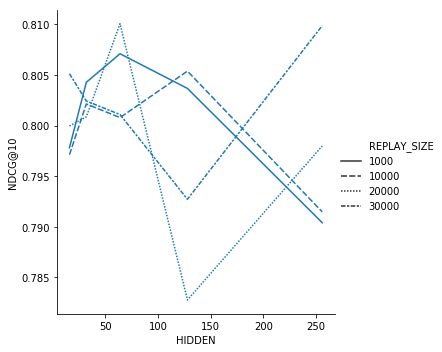

In [16]:
sns.relplot(x="HIDDEN", y="NDCG@10",
#             size="BATCH", 
            style="REPLAY_SIZE",
            kind="line", data=df.groupby(['HIDDEN', 'REPLAY_SIZE']).mean().reset_index());

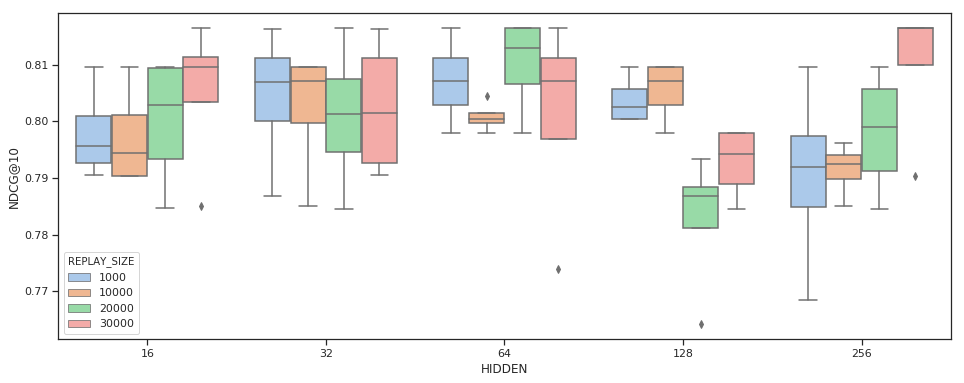

In [25]:
sns.set(style="ticks", palette="pastel")

fig = plt.figure(figsize=(16, 6))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="HIDDEN", y="NDCG@10",
            hue="REPLAY_SIZE",
            data=df)

fig.savefig('ablation_study.eps', format='eps')

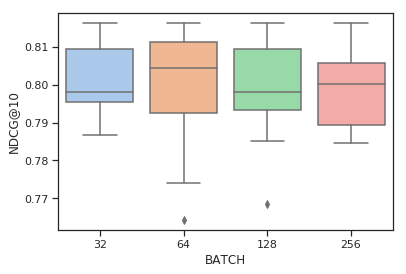

In [20]:
sns.boxplot(x="BATCH", y="NDCG@10",
#             hue="BATCH",
            data=df)

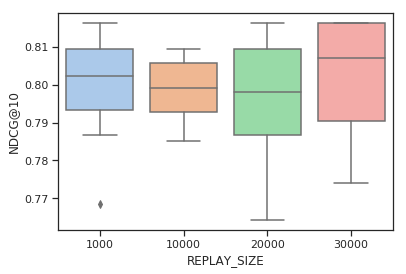

In [21]:
sns.boxplot(x="REPLAY_SIZE", y="NDCG@10",
#             hue="BATCH",
            data=df)